Sales forecasting has always been one of the most predominant applications of machine learning. Big companies like Walmart have been employing this technique to achieve steady and enormous growth over decades now. In this challenge, you as a data scientist must use machine learning to help a small grocery store in predicting its future sales and making better business decisions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Test.csv
/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Sample_Submission.xlsx
/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Train.csv


# Dataset

In [2]:
train = pd.read_csv("/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Train.csv")
test = pd.read_csv("/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Test.csv")
sample = pd.read_excel("/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Sample_Submission.xlsx")

In [3]:
print(train.head())
train.shape

   Day  GrocerySales
0    1       8418.59
1    2       8447.47
2    3       8336.49
3    4       8579.17
4    5       8524.31


(692, 2)

In [4]:
print(test.head())
test.shape

   Day
0  693
1  694
2  695
3  696
4  697


(90, 1)

In [5]:
print(sample.head())
sample.shape

   GrocerySales
0   8606.187433
1   8973.760000
2   8946.170000
3   9138.900000
4   9012.110000


(90, 1)

In [6]:
train.isnull().sum()

Day             0
GrocerySales    0
dtype: int64

# Univirate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb294109b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb29411b5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb294172dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb294109c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb294121550>],
 'means': []}

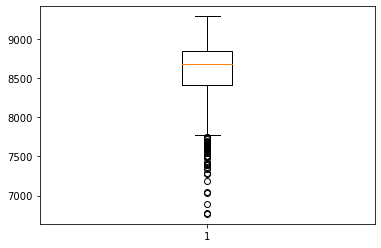

In [7]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(train['GrocerySales'])

# Deleting outliers

In [8]:
# We are deleting the outliers from quartile 27th percentile and 73th percentile as appropriate for our model.
Q1 = train.quantile(0.27)
Q3 = train.quantile(0.73)
IQR = Q3 - Q1
print(IQR)

Day             317.860000
GrocerySales    406.897763
dtype: float64


In [9]:
train.shape

(692, 2)

In [10]:
train1 = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train1.shape

(629, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb28dff3dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb28dff78d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb28dff3190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28dff3e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28df80850>],
 'means': []}

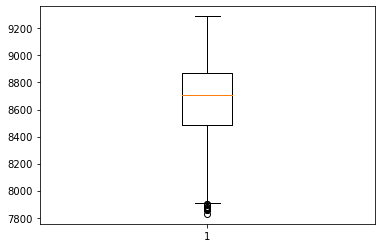

In [11]:
plt.boxplot(train1['GrocerySales'])

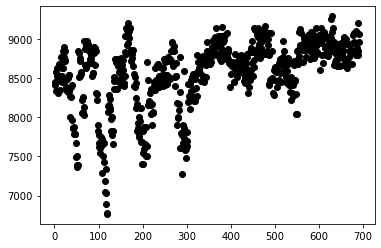

In [12]:
plt.scatter(train['Day'], train['GrocerySales'],  color='black')

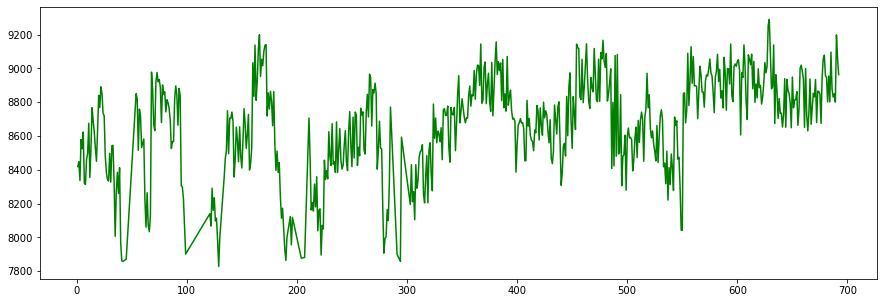

In [13]:
fig= plt.figure(figsize=(15,5))
plt.plot(train1['Day'], train1['GrocerySales'], color='green',markersize=1)

# Select features and labels

In [14]:
#Fetaures 
X = train1['Day'].copy()
X.head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [15]:
y = train1['GrocerySales'].copy()
y.head()

0    8418.59
1    8447.47
2    8336.49
3    8579.17
4    8524.31
Name: GrocerySales, dtype: float64

In [16]:
X = np.array(train1['Day'])
X=X.reshape(-1, 1)
X

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 45],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
       [ 80],
      

# Split the data

In [17]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state = 0)

# Let's try different algorithms and check the mean square error

# LinearRegression

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(train_X,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
predict = regr.predict(val_X)
print('Mean squared error: %.2f'
      % mean_squared_error(val_y,predict))

Mean squared error: 66438.76


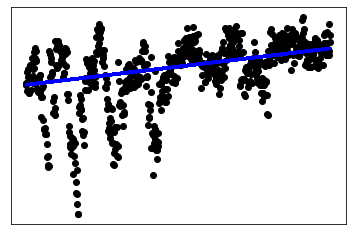

In [20]:
plt.scatter(train['Day'], train['GrocerySales'],  color='black')
plt.plot(val_X, predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# KNeighborsRegressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor()
neigh.fit(train_X,train_y)
predict_n = neigh.predict(val_X)
print('Mean squared error: %.2f'
     % mean_squared_error(val_y,predict_n))

Mean squared error: 25056.06


## Tuning of KNeighborsRegressor

In [22]:
parameters_for_testing = {
   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
   'n_neighbors':[1,4,2],
   'weights':['uniform','distance'],
    
}

In [23]:
from sklearn.model_selection import GridSearchCV
gsearch1 = GridSearchCV(cv=8,estimator = neigh, param_grid = parameters_for_testing, n_jobs=-1,verbose=0,scoring='neg_mean_squared_error')
gsearch1.fit(train_X,train_y)

GridSearchCV(cv=8, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 4, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
print (gsearch1.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [25]:
print (gsearch1.best_score_)

-26268.02312059378


In [26]:
predict_grid = gsearch1.predict(val_X)
print('Mean squared error: %.2f'
     % np.sqrt(mean_squared_error(val_y,predict_grid)))

Mean squared error: 144.41


# DecisionTreeRegressor

In [27]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(train_X,train_y)
predict_clf = clf.predict(val_X)
print('Mean squared error: %.2f'
     % mean_squared_error(val_y,predict_clf))

Mean squared error: 34833.34


## Tuning of DecisionTreeRegressor

In [28]:
parameters = {
   'criterion':['mse', 'friedman_mse', 'mae'],
   'splitter':['best', 'random'],
   'min_samples_split':[2,3,4,5]
}

In [29]:
gsearch2 = GridSearchCV(estimator = clf, param_grid = parameters, n_jobs=-1,verbose=0,scoring='neg_mean_squared_error')
gsearch2.fit(train_X,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'min_samples_split': [2, 3, 4, 5],
                        

In [30]:
print('best params')
print (gsearch2.best_params_)
print('best score')
print (gsearch2.best_score_)

best params
{'criterion': 'mse', 'min_samples_split': 5, 'splitter': 'best'}
best score
-34106.57598992788


In [31]:
predict_grid2 = gsearch2.predict(val_X)
print('Mean squared error: %.2f'
     % (mean_squared_error(val_y,predict_grid2)))

Mean squared error: 30808.99


# XGBOOST

In [32]:
import xgboost as xgb
xg = xgb.XGBRegressor(eta=0.6599999999999999999999999999)
xg = xg.fit(train_X,train_y)
predict_x = xg.predict(val_X)
print('Mean squared error is: {}'.format((mean_squared_error(val_y,predict_x))))

Mean squared error is: 26335.529908967488


# Ensembling Methods

# 1. Voting

In [33]:
from sklearn.ensemble import VotingRegressor
ereg = VotingRegressor(estimators=[('nh', neigh), ('tree', gsearch1)])
ereg = ereg.fit(train_X,train_y)
predict_clf = ereg.predict(val_X)
print('Mean squared error: %.2f'
     % mean_squared_error(val_y,predict_clf))

Mean squared error: 22304.38


# 2. Bagging

In [34]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(base_estimator=xg, n_estimators=14, random_state=0).fit(train_X,train_y)
predict_bag = bag.predict(val_X)
print('Mean squared error is {}'.format((mean_squared_error(val_y,predict_bag))))


Mean squared error is 23058.895711036093


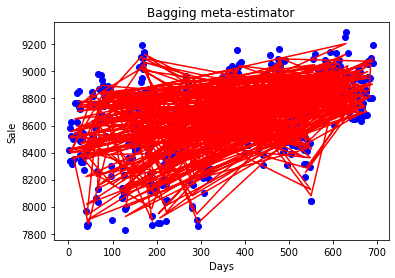

In [35]:
plt.scatter(train_X, train_y, color = 'blue') 
  
plt.plot(train_X, bag.predict(train_X), color = 'red') 
plt.title('Bagging meta-estimator') 
plt.xlabel('Days') 
plt.ylabel('Sale') 
  
plt.show() 

# CatBoostRegressor

In [36]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
#train the model
model.fit(train_X,train_y)
# make the prediction using the resulting model
preds = model.predict(val_X)
print('Mean squared error: %.2f'
     % (mean_squared_error(val_y,preds)))

Learning rate set to 0.034537
0:	learn: 288.3139435	total: 49.7ms	remaining: 49.6s
1:	learn: 285.2680022	total: 50.5ms	remaining: 25.2s
2:	learn: 282.8553835	total: 51.2ms	remaining: 17s
3:	learn: 280.1960311	total: 51.9ms	remaining: 12.9s
4:	learn: 277.5463573	total: 52.5ms	remaining: 10.4s
5:	learn: 275.0527292	total: 53.1ms	remaining: 8.79s
6:	learn: 272.3267429	total: 53.7ms	remaining: 7.62s
7:	learn: 270.1432185	total: 54.5ms	remaining: 6.75s
8:	learn: 268.5827602	total: 55.1ms	remaining: 6.07s
9:	learn: 266.7023255	total: 55.7ms	remaining: 5.52s
10:	learn: 264.7014696	total: 56.4ms	remaining: 5.07s
11:	learn: 262.9781150	total: 56.9ms	remaining: 4.69s
12:	learn: 260.9203164	total: 57.5ms	remaining: 4.37s
13:	learn: 258.9060229	total: 58.2ms	remaining: 4.1s
14:	learn: 257.0846843	total: 58.8ms	remaining: 3.86s
15:	learn: 255.0240746	total: 59.4ms	remaining: 3.65s
16:	learn: 253.1916857	total: 60ms	remaining: 3.47s
17:	learn: 251.9334736	total: 60.6ms	remaining: 3.31s
18:	learn: 25

# lightgbm

In [37]:
import lightgbm as lgb 
lg = lgb.LGBMRegressor()
lg = lg.fit(train_X,train_y)
predict_l = lg.predict(val_X)
print('Mean squared error: %.2f'
     % (mean_squared_error(val_y,predict_l)))

Mean squared error: 25469.76


In [38]:
test = np.array(test)
test=test.reshape(-1, 1)
test

array([[693],
       [694],
       [695],
       [696],
       [697],
       [698],
       [699],
       [700],
       [701],
       [702],
       [703],
       [704],
       [705],
       [706],
       [707],
       [708],
       [709],
       [710],
       [711],
       [712],
       [713],
       [714],
       [715],
       [716],
       [717],
       [718],
       [719],
       [720],
       [721],
       [722],
       [723],
       [724],
       [725],
       [726],
       [727],
       [728],
       [729],
       [730],
       [731],
       [732],
       [733],
       [734],
       [735],
       [736],
       [737],
       [738],
       [739],
       [740],
       [741],
       [742],
       [743],
       [744],
       [745],
       [746],
       [747],
       [748],
       [749],
       [750],
       [751],
       [752],
       [753],
       [754],
       [755],
       [756],
       [757],
       [758],
       [759],
       [760],
       [761],
       [762],
       [763],
      

In [39]:
bag = BaggingRegressor(base_estimator=xg, n_estimators=108, random_state=0).fit(X,y)

In [40]:
predict = bag.predict(test)

In [41]:
df = pd.DataFrame(predict,columns=['GrocerySales'])
df.head()

,GrocerySales
0,9002.641602
1,9002.641602
2,9002.641602
3,9002.641602
4,9002.641602


In [42]:
df.to_excel("submission2.xlsx")